In [1]:
#import python packages/libraries 
import pandas as pd #pandas
import numpy as np #numpy
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn
import plotly.express as px #plotly


In [2]:
#read data from csv file and convert to data frame
df_loan_dataset = pd.read_csv('/Users/liamoleary/GitHub/Data/lending_club_loan_dataset.csv')

#print top 2 lines of dataframe 
print(df_loan_dataset.head(5))

         id grade  annual_inc  short_emp  emp_length_num home_ownership  \
0  11454641     A      100000          1               1           RENT   
1   9604874     A       83000          0               4            OWN   
2   9684700     D       78000          0              11       MORTGAGE   
3   9695736     D       37536          0               6       MORTGAGE   
4   9795013     D       65000          0              11       MORTGAGE   

     dti             purpose        term  last_delinq_none  \
0  26.27         credit_card   36 months                 1   
1   5.39         credit_card   36 months                 0   
2  18.45  debt_consolidation   60 months                 1   
3  12.28             medical   60 months                 0   
4  11.26  debt_consolidation   36 months                 0   

   last_major_derog_none  revol_util  total_rec_late_fee  od_ratio  bad_loan  
0                    NaN        43.2                 0.0  0.160624         0  
1                 

In [3]:
#information on dataset - number of records, non-null columns and data types
print(df_loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [4]:
#shape of the dataset - rows and columns 
print(df_loan_dataset.shape)

(20000, 15)


In [5]:
#remove duplicates (if any)
df_loan_dataset_1 = df_loan_dataset.drop_duplicates(keep='first')
print(df_loan_dataset_1.shape)

# same result as previous dataset which indicates there are no duplicates in our dataset 

(20000, 15)


In [6]:
#summary statistics for dataset (numeric variables) - count, mean, standard deviation, min, max and 25, 50 and 75th percentiles 
df_loan_dataset.describe().round(1)


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,20000.0,20000.0,20000.0,20000.0,19846.0,20000.0,574.0,20000.0,20000.0,20000.0,20000.0
mean,7590662.1,73349.6,0.1,6.8,16.6,0.5,0.8,56.0,0.3,0.5,0.2
std,1609593.3,45198.6,0.3,3.8,7.6,0.5,0.4,42.1,3.1,0.3,0.4
min,586040.0,8412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6206282.8,47000.0,0.0,3.0,10.9,0.0,1.0,38.8,0.0,0.3,0.0
50%,7378896.5,65000.0,0.0,7.0,16.2,1.0,1.0,57.1,0.0,0.5,0.0
75%,8766234.8,88000.0,0.0,11.0,22.1,1.0,1.0,73.9,0.0,0.8,0.0
max,11454641.0,1000000.0,1.0,11.0,35.0,1.0,1.0,5010.0,96.5,1.0,1.0


In [7]:
#count the number of unique values 
df_loan_dataset.nunique()   

id                       20000
grade                        7
annual_inc                2566
short_emp                    2
emp_length_num              12
home_ownership               3
dti                       3295
purpose                     12
term                         3
last_delinq_none             2
last_major_derog_none        2
revol_util                1030
total_rec_late_fee         166
od_ratio                 20000
bad_loan                     2
dtype: int64

In [8]:
#looking at the count of unique values there are some values we would like to explore further to ensure they contain reasonable values:
df_loan_dataset['last_delinq_none'].unique()
 

array([1, 0])

In [9]:
# missing values - for all variables 
missing_values = df_loan_dataset.isnull().sum().to_frame().rename(columns={0:"absolute"})
missing_values["percent"] = (missing_values.apply(lambda x: x/x.sum())*100).round(2)
missing_values

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


In [10]:
# summary of characteristics of non-numeric variables
df_loan_dataset.describe(include=[np.object])

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3571/297930248.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_loan_dataset.describe(include=[np.object])


,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


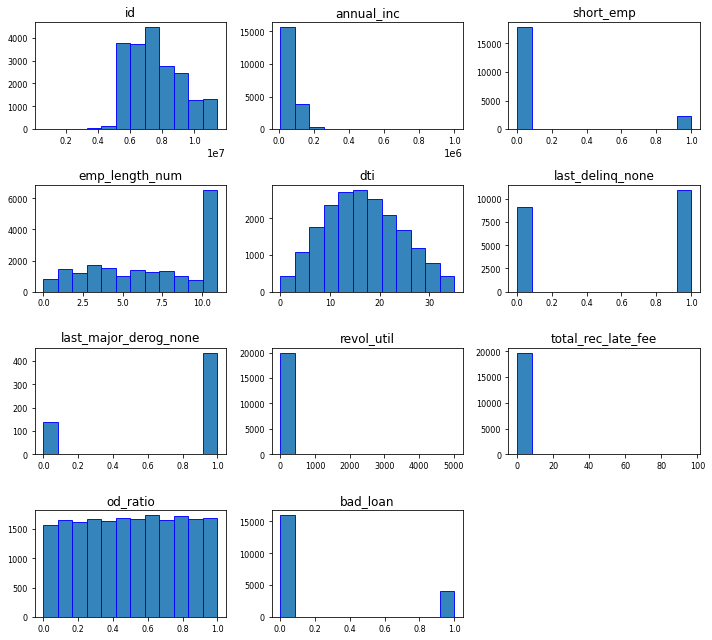

In [11]:
#histogram for numerical values 
df_loan_dataset.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

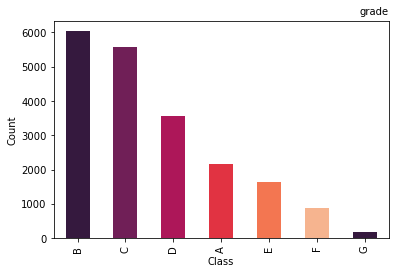

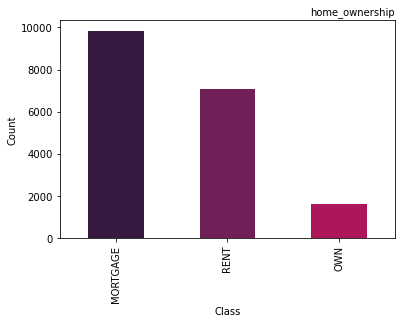

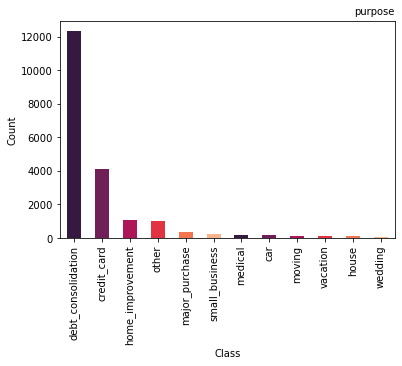

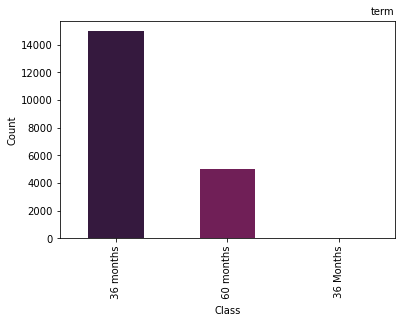

In [12]:
#bar charrts for categorical values
for col in df_loan_dataset.select_dtypes(include=["object"]).columns:
    df_loan_dataset[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

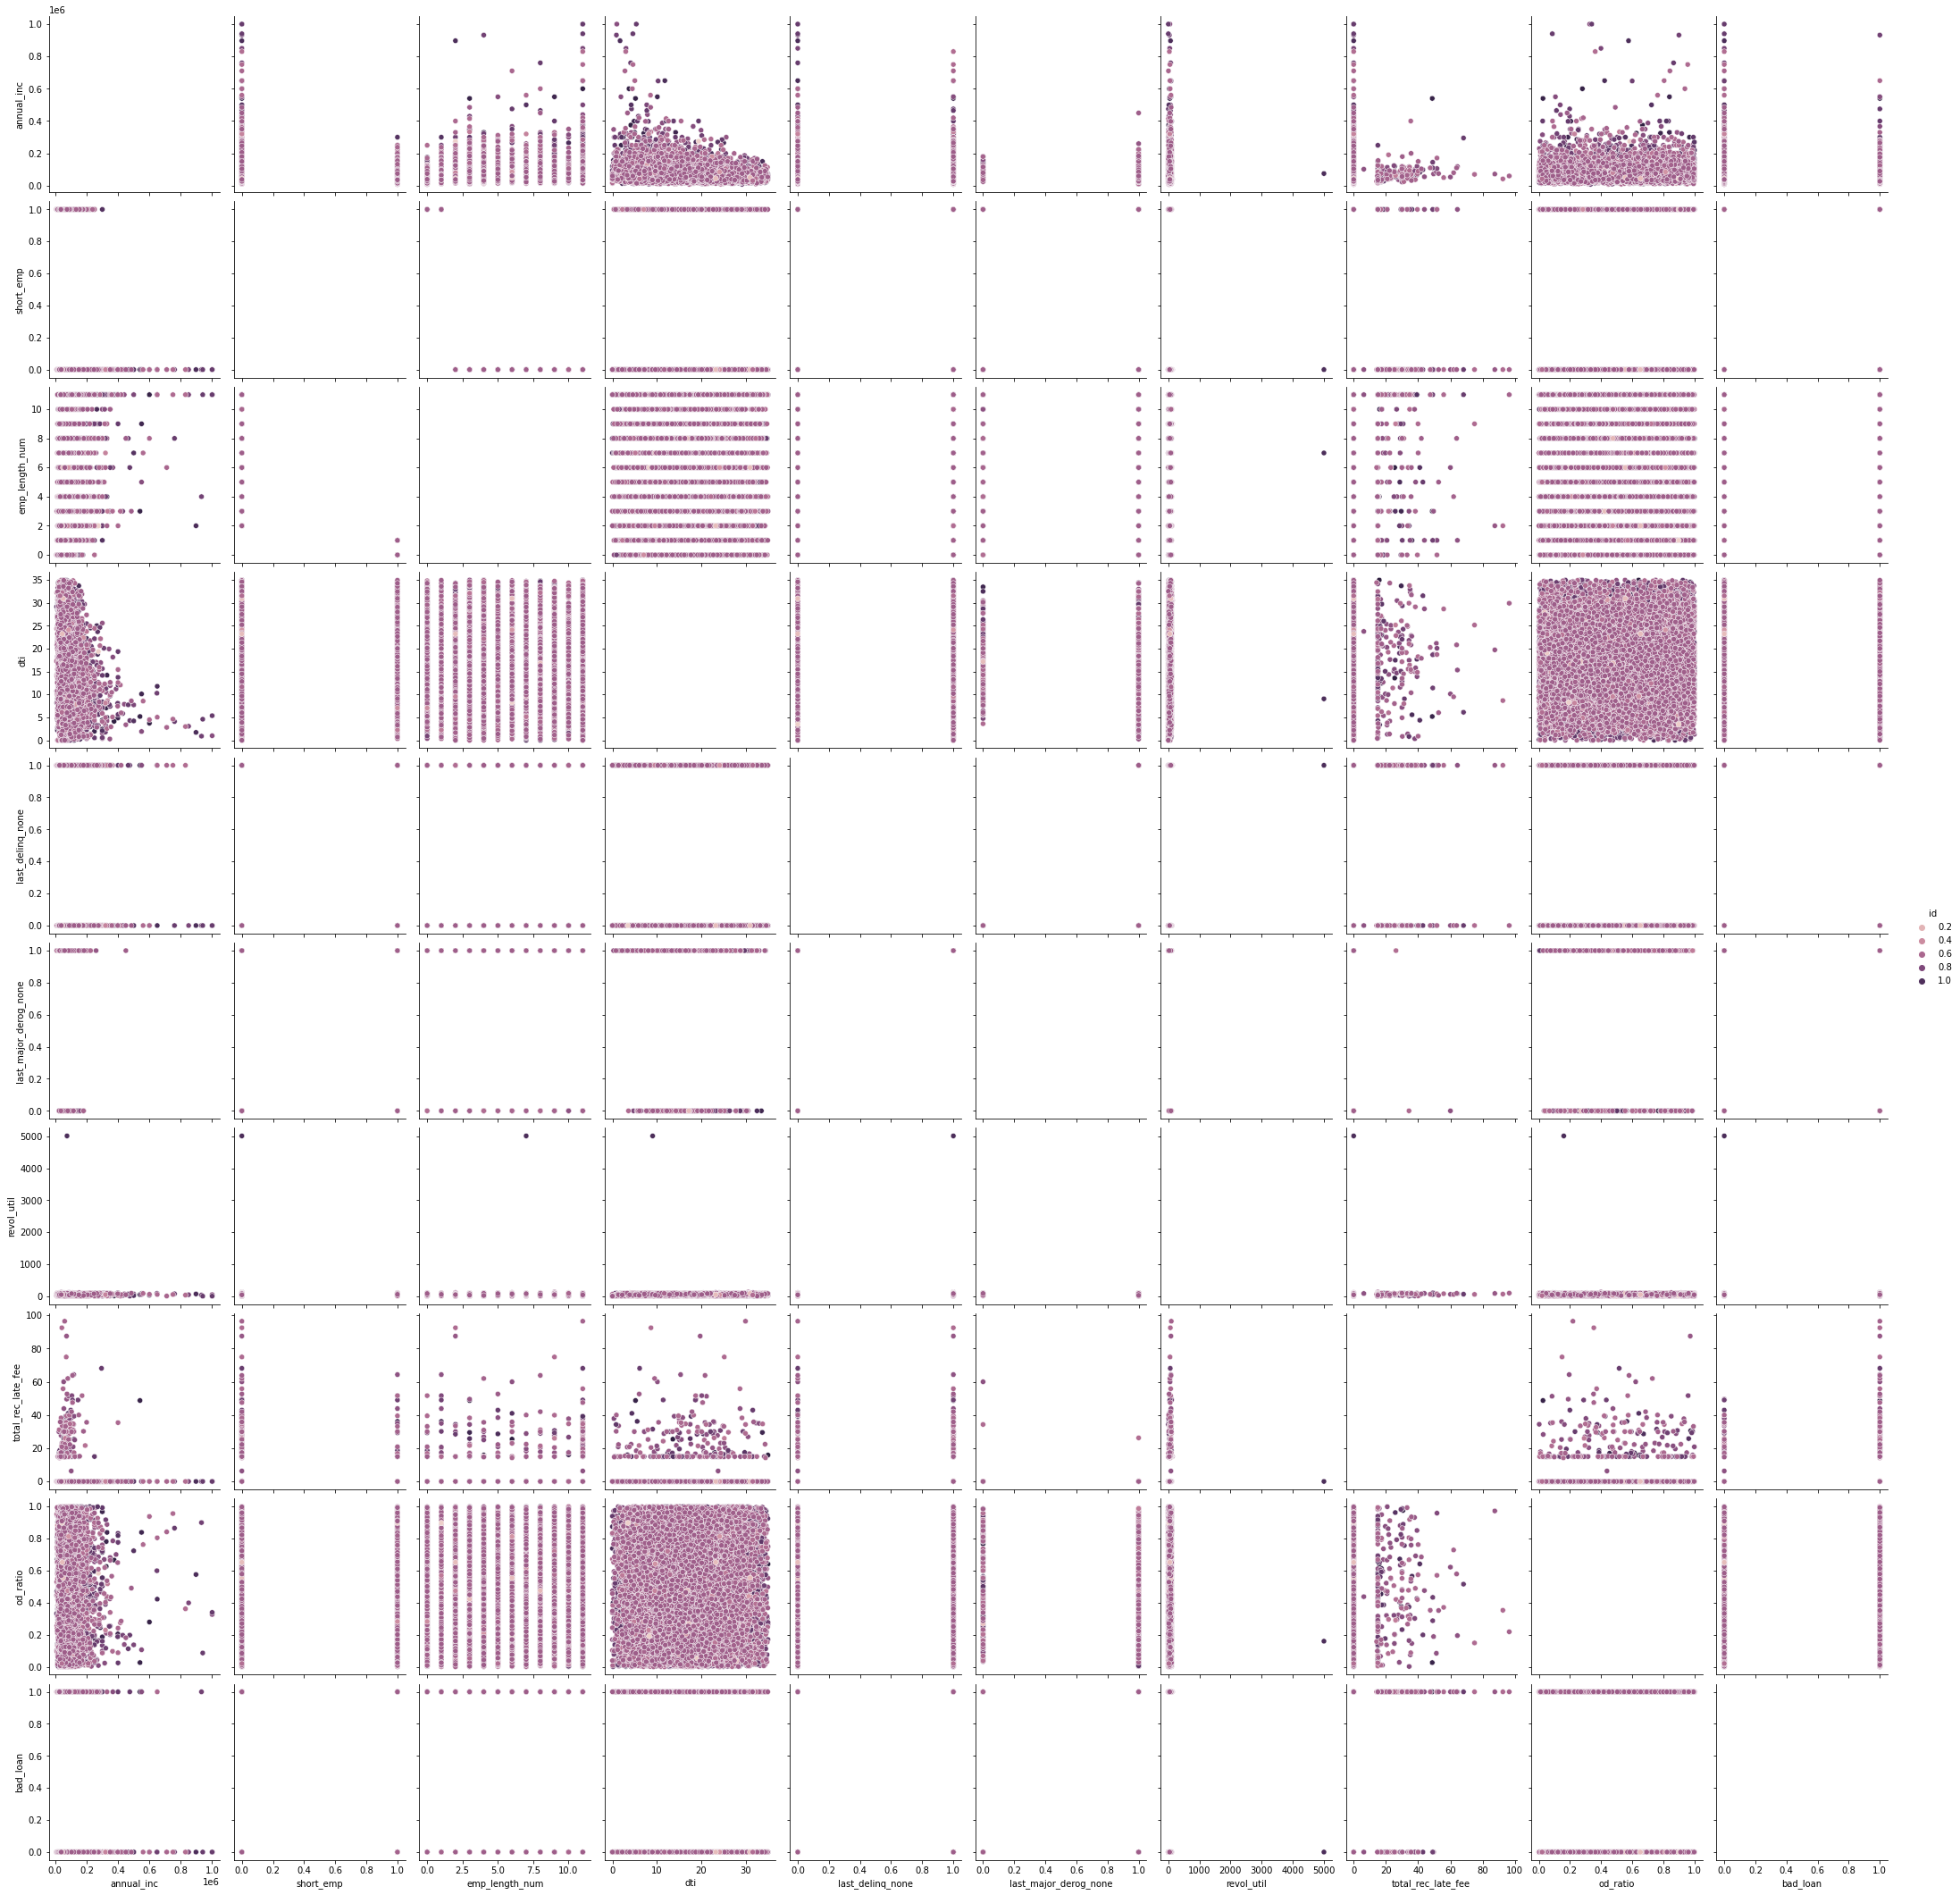

In [13]:
sns.pairplot(df_loan_dataset, hue="id", height=3)

In [14]:
#correlation of variables 
df_loan_dataset.corr().round(2)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.00,0.02,0.02,0.00,0.01,-0.03,-0.05,-0.01,-0.01,0.00,-0.04
annual_inc,0.02,1.00,-0.10,0.12,-0.23,-0.08,0.02,0.02,0.01,-0.00,-0.09
short_emp,0.02,-0.10,1.00,-0.58,0.00,0.03,0.07,-0.01,0.01,-0.01,0.04
emp_length_num,0.00,0.12,-0.58,1.00,0.01,-0.05,-0.16,0.03,-0.01,0.00,-0.04
dti,0.01,-0.23,0.00,0.01,1.00,0.03,0.00,0.10,0.01,0.01,0.14
last_delinq_none,-0.03,-0.08,0.03,-0.05,0.03,1.00,0.60,0.01,-0.01,-0.00,0.02
last_major_derog_none,-0.05,0.02,0.07,-0.16,0.00,0.60,1.00,-0.03,-0.09,0.05,-0.01
revol_util,-0.01,0.02,-0.01,0.03,0.10,0.01,-0.03,1.00,0.01,-0.01,0.05
total_rec_late_fee,-0.01,0.01,0.01,-0.01,0.01,-0.01,-0.09,0.01,1.00,-0.00,0.13
od_ratio,0.00,-0.00,-0.01,0.00,0.01,-0.00,0.05,-0.01,-0.00,1.00,0.00


In [15]:
#heatmap showing the correlation of all variables 
heatmap = px.imshow(df_loan_dataset.corr())
heatmap.show()


/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning:

Horizontal orientation ignored with only `y` specified.

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py

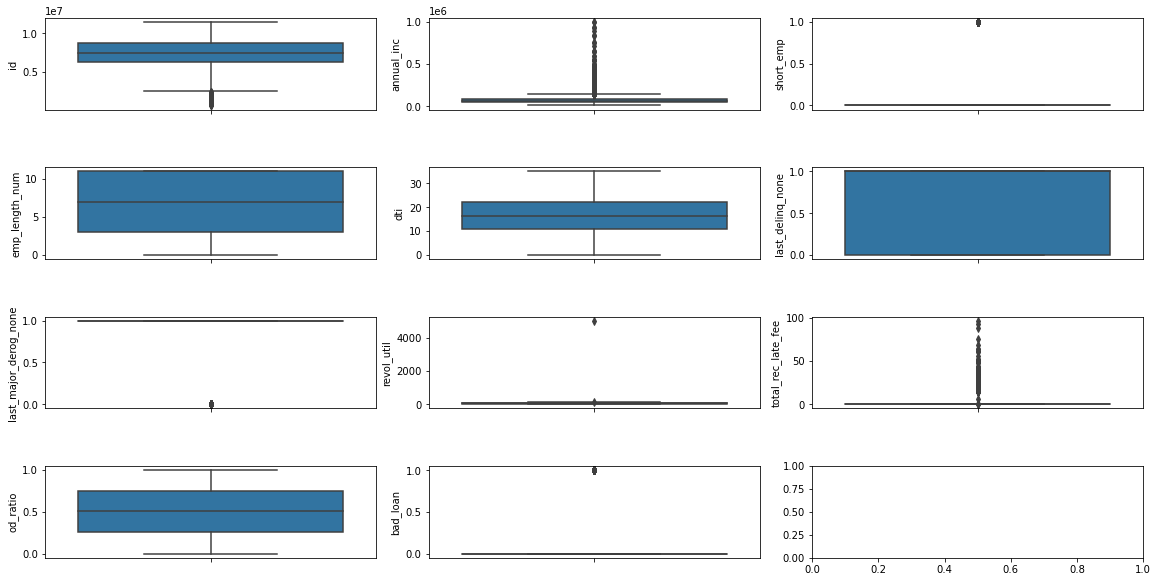

In [16]:
#detect outliers 
data_numercial = df_loan_dataset.select_dtypes(exclude=["object","category"]).copy()

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_numercial.items():
    sns.boxplot(y=k, data=data_numercial, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

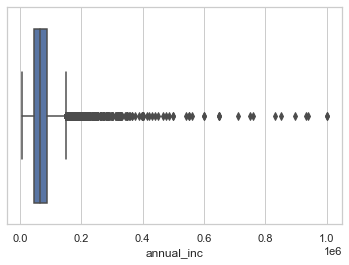

In [17]:
#want to drill down further on annual_inc to detect outliers
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset['annual_inc'])

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

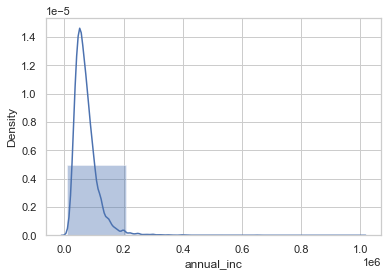

In [18]:
#probability density function - annual inc
sns.distplot(df_loan_dataset['annual_inc'],bins=5)

In [33]:
df_loan_dataset1 = df_loan_dataset[df_loan_dataset.annual_inc < 200000]



In [34]:
df_loan_dataset1['annual_inc'].max()

199597

In [35]:
df_loan_dataset1['annual_inc'].count()

19650

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='annual_inc'>

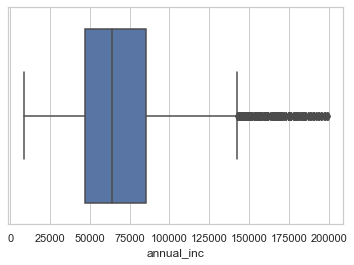

In [36]:
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset1['annual_inc'])

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='revol_util'>

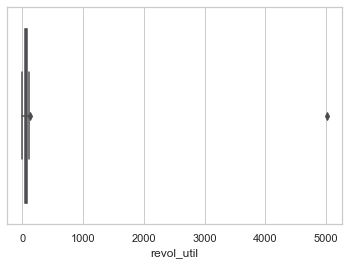

In [37]:
#want to drill down further on revol_util to detect outliers
sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset1['revol_util'])

In [38]:
df_loan_dataset1['revol_util'].max()


5010.0

In [39]:
df_loan_dataset2 = df_loan_dataset1[df_loan_dataset1.revol_util != 5010.0]

In [40]:
df_loan_dataset2['revol_util'].max()

128.1

In [41]:
df_loan_dataset3 = df_loan_dataset2[df_loan_dataset2.revol_util != 128.1]

/Users/liamoleary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='revol_util'>

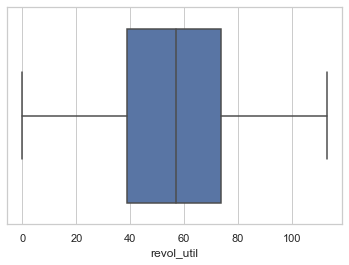

In [42]:
#sns.set_theme(style="whitegrid")
#sns.boxplot(df_loan_dataset_2['revol_util'])

sns.set_theme(style="whitegrid")
sns.boxplot(df_loan_dataset3['revol_util'])

In [43]:
df_loan_dataset3['bad_loan'].value_counts()


0    15700
1     3948
Name: bad_loan, dtype: int64

In [44]:
df_loan_dataset3['last_major_derog_none'].value_counts()

1.0    430
0.0    138
Name: last_major_derog_none, dtype: int64

In [45]:
df_loan_dataset3['last_delinq_none'].value_counts()

1    10775
0     8873
Name: last_delinq_none, dtype: int64

In [46]:
df_loan_dataset3['short_emp'].value_counts()

0    17417
1     2231
Name: short_emp, dtype: int64

In [47]:
#missing Values
for column in df_loan_dataset3.columns:
    if df_loan_dataset3[column].isna().sum() != 0:
        missing = df_loan_dataset3[column].isna().sum()
        portion = (missing / df_loan_dataset3.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")
        

'home_ownership': number of missing values '1469' ---> '7.477%'
'dti': number of missing values '152' ---> '0.774%'
'last_major_derog_none': number of missing values '19080' ---> '97.109%'


In [48]:
#replace missing values - home_ownership (mode imputation)
df_loan_dataset3["home_ownership"] = df_loan_dataset3.home_ownership.fillna(df_loan_dataset3.home_ownership.value_counts().index[0])

df_loan_dataset3.home_ownership.value_counts(dropna=False)

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3571/4127133876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MORTGAGE    11080
RENT         6985
OWN          1583
Name: home_ownership, dtype: int64

In [49]:
#replace missing values - dti (mean)
df_loan_dataset3["dti"] = df_loan_dataset3.dti.fillna(df_loan_dataset3.dti.mean())

df_loan_dataset3.dti.value_counts(dropna=False)

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3571/2528799242.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16.70749    152
19.64000     20
15.87000     20
11.45000     19
19.25000     19
           ... 
2.32000       1
34.98000      1
33.44000      1
2.63000       1
32.53000      1
Name: dti, Length: 3293, dtype: int64

In [50]:
#replace missing values - last_major_derog_none (remove)
df_loan_dataset3.drop("last_major_derog_none", axis=1, inplace=True)


/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3571/2460903156.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df_loan_dataset3['column name'].isna().sum()

KeyError: 'column name'

In [52]:
df_loan_dataset3['annual_inc'] = df_loan_dataset3.annual_inc.fillna(df_loan_dataset3.annual_inc.mean())

/var/folders/k3/46_t4z7174qbg9yzk8mh2kpm0000gn/T/ipykernel_3571/1065586536.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_loan_dataset3['column name'].isna().sum()

KeyError: 'column name'

In [54]:
#missing Values
for column in df_loan_dataset3.columns:
    if df_loan_dataset3[column].isna().sum() != 0:
        missing = df_loan_dataset3[column].isna().sum()
        portion = (missing / df_loan_dataset3.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')


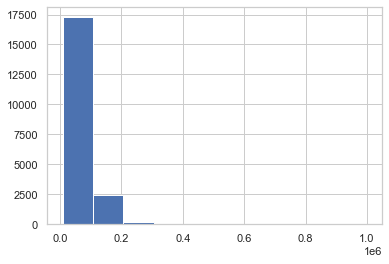

In [55]:
# print(df_loan_dataset.head(10))

#EDA - Look at the data 
#Get an idea of the data to understand outliers and missing data etc 
#Clean data 
    #drop columns - this can be done once we understand which features we want to keep 
    #drop duplicate data 
#Re-do EDA 

print(df_loan_dataset.columns)


df_loan_dataset['annual_inc'].hist()
plt.show()